In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

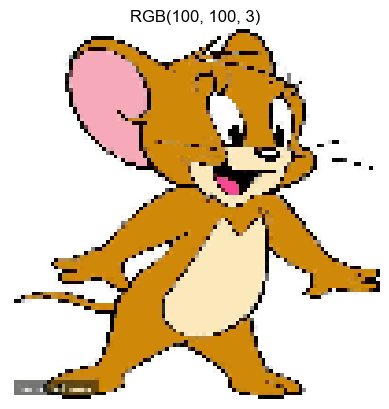

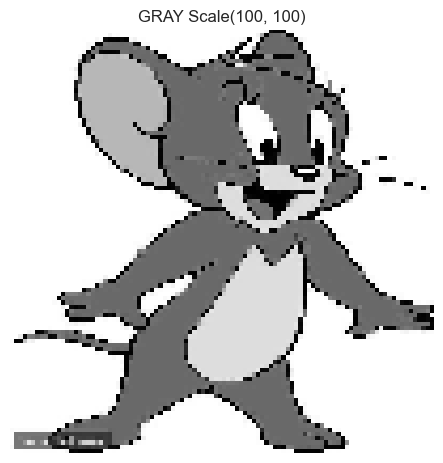

In [3]:
img_ = cv2.imread("jerry.jpeg")
img_ = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
drawImg(img,"RGB")
drawImg(img_gray,"GRAY Scale")


# Hardcoded Filters

In [4]:
# Hardcoded filters 

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] # Shape = 3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    
    return new_img # Activation map
                    
    

In [9]:
blur_filter = np.ones((3,3))/9.0

output1 = convolution(img_gray,blur_filter)

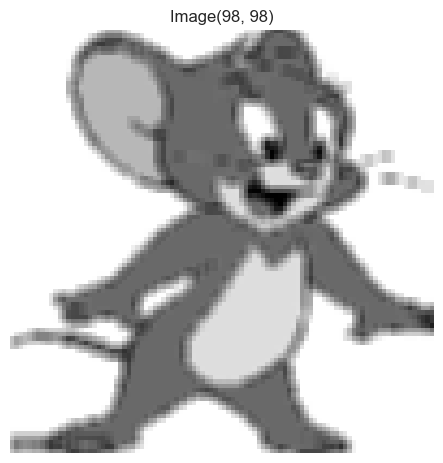

In [6]:
drawImg(output1)

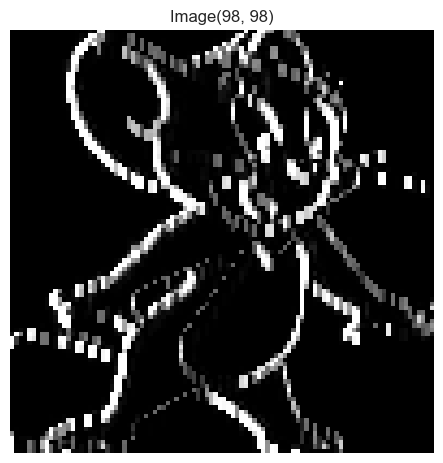

In [7]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

output2 = convolution(img_gray,edge_filter)

drawImg(output2)

# Padding 

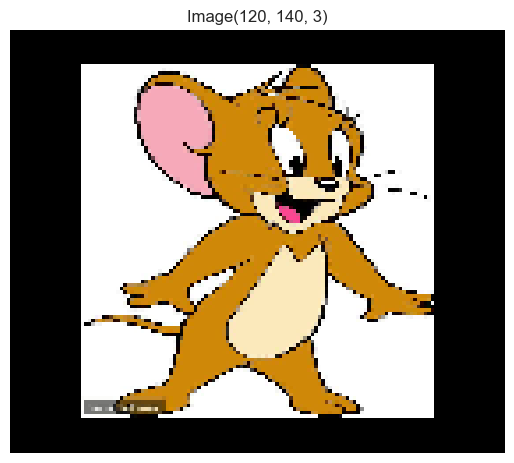

In [11]:
# Padding to this image

pad_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)

drawImg(pad_img)

# Pooling 

In [12]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode =="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
    return output
    
    

In [13]:
print(pooling(X))

[[6. 8.]
 [3. 4.]]


 # CNN Building Fashion MNIST Classifier in Keras

In [14]:
import pandas as pd
import numpy as np
from keras.models import Sequential 
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

2023-01-03 07:42:42.497470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Preparation

In [15]:
x = pd.read_csv("./fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print(X.shape,y.shape)

(10000, 784) (10000,)


In [16]:
np.unique(y,return_counts=True) # Data is well Balanced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [17]:
X_train = X.reshape((-1,28,28,1)) # 1 at last means its a grayscale image

# converting labels from 0-9 into 0000010000(it represents label 5), 
# similarly 0100000000 is label 1
Y_train = np_utils.to_categorical(y) 


print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [18]:
import matplotlib.pyplot as plt

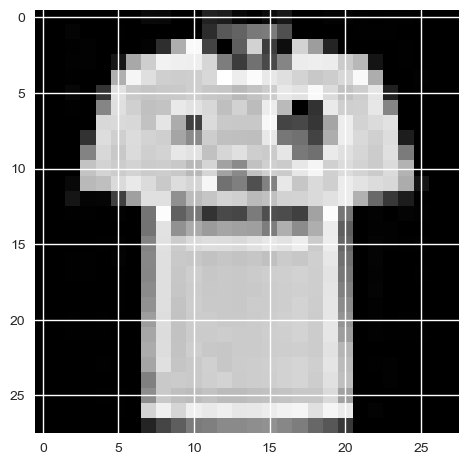

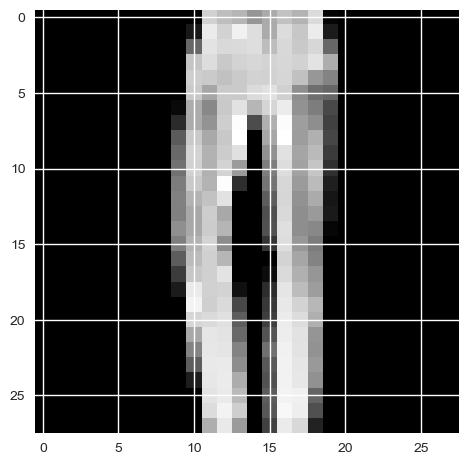

In [19]:
for i in range(2):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

# CNN Model

In [20]:
model = Sequential()

# Convolution2D(no. of filters
#.              ,each filter of size (3,3) (Note: this can vary acording to need)
#               ,need to specify the input shape for very first layer 
#                after that no need coz model is smart enough 
#                to get the input from first layer
#               )


model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))

# 0.25 means it will randomly drop 25% of the neurons from the previous layer
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))

# Flatten is not a layer its just a function used to make 3D layer into linear layer
model.add(Flatten())

# Dense layer is used to make out from the 10 classes with the activation as softmax
model.add(Dense(10,activation='softmax'))
model.summary()

 

2023-01-03 07:43:01.202716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [23]:
hist = model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/10
32/32 [==============================] - 24s 724ms/step - loss: 1.6470 - accuracy: 0.4319 - val_loss: 1.0686 - val_accuracy: 0.6455
Epoch 2/10
32/32 [==============================] - 19s 589ms/step - loss: 0.8466 - accuracy: 0.6866 - val_loss: 0.7644 - val_accuracy: 0.7165
Epoch 3/10
32/32 [==============================] - 19s 592ms/step - loss: 0.6818 - accuracy: 0.7420 - val_loss: 0.6640 - val_accuracy: 0.7565
Epoch 4/10
32/32 [==============================] - 20s 620ms/step - loss: 0.6027 - accuracy: 0.7775 - val_loss: 0.6224 - val_accuracy: 0.7765
Epoch 5/10
32/32 [==============================] - 19s 595ms/step - loss: 0.5443 - accuracy: 0.7994 - val_loss: 0.5770 - val_accuracy: 0.7870
Epoch 6/10
32/32 [==============================] - 17s 526ms/step - loss: 0.5209 - accuracy: 0.8110 - val_loss: 0.5184 - val_accuracy: 0.8245
Epoch 7/10
32/32 [==============================] - 18s 547ms/step - loss: 0.4975 - accuracy: 0.8166 - val_loss: 0.4976 - val_accuracy: 0.8295

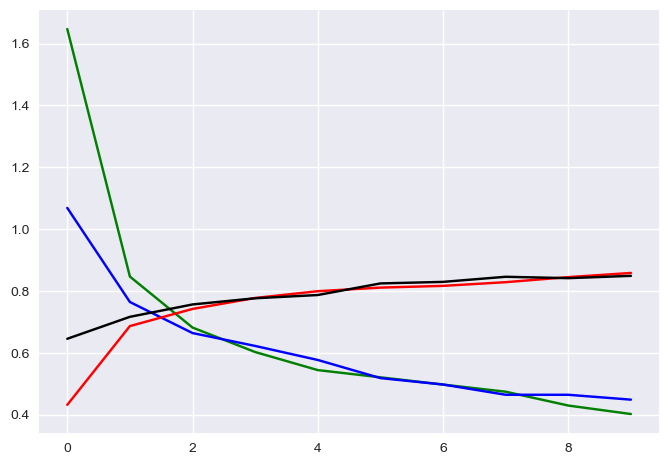

In [26]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')

plt.show()